<a href="https://colab.research.google.com/github/uzmagull/chatgpt-prompt-classification-nlp/blob/main/chatgpt_prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import Libraries

In [28]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Upload Dataset

In [2]:
from google.colab import files
uploaded = files.upload()


Saving chatgpt_prompts_dataset.csv to chatgpt_prompts_dataset (1).csv


# Load Dataset

In [4]:
df = pd.read_csv("chatgpt_prompts_dataset.csv")
df.head()
print("Shape:", df.shape)
df['category'].value_counts()



Shape: (1000, 2)


,count
category,
Business,164
Summarization,156
Translation,147
Personal,140
Academic,136
Creative,131
Coding,126


# Text Cleaning

In [29]:
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)


In [7]:
df["clean_text"] = df["prompt_text"].apply(clean_text)
df.head()


,prompt_text,category,clean_text
0,Write a pitch deck idea for career growth,Business,write pitch deck idea career growth
1,Write a short story on digital marketing,Creative,write short story digital marketing
2,Guide me about web development,Personal,guide web development
3,Explain interview preparation in 5 bullet points,Summarization,explain interview preparation bullet points
4,Convert database indexing into English,Translation,convert database indexing english


# Encode Labels

In [30]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["category"])

df[['category','label']].drop_duplicates()


,category,label
0,Business,1
1,Creative,3
2,Personal,4
3,Summarization,5
4,Translation,6
6,Academic,0
12,Coding,2


# Train/Test Split

In [31]:
X = df["clean_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)


(800,) (200,)


# TF-IDF Vectorization

In [32]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

X_train_tfidf.shape


(800, 101)

# ML Model Training

In [33]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 1.0


In [12]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 1.0


In [13]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 1.0


In [14]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_tfidf, y_train)

y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 1.0


In [15]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

results


{'Logistic Regression': 1.0,
 'Naive Bayes': 1.0,
 'SVM': 1.0,
 'Random Forest': 1.0}

In [43]:
from sklearn.metrics import classification_report

def evaluate_model(name, y_true, y_pred):
    print(f"\nClassification Report ({name}):\n")
    print(classification_report(y_true, y_pred, target_names=le.classes_))

In [44]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Naive Bayes", y_test, y_pred_nb)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("Random Forest", y_test, y_pred_rf)



Classification Report (Logistic Regression):

               precision    recall  f1-score   support

     Academic       1.00      1.00      1.00        27
     Business       1.00      1.00      1.00        33
       Coding       1.00      1.00      1.00        25
     Creative       1.00      1.00      1.00        26
     Personal       1.00      1.00      1.00        28
Summarization       1.00      1.00      1.00        31
  Translation       1.00      1.00      1.00        30

     accuracy                           1.00       200
    macro avg       1.00      1.00      1.00       200
 weighted avg       1.00      1.00      1.00       200


Classification Report (Naive Bayes):

               precision    recall  f1-score   support

     Academic       1.00      1.00      1.00        27
     Business       1.00      1.00      1.00        33
       Coding       1.00      1.00      1.00        25
     Creative       1.00      1.00      1.00        26
     Personal       1.00      

# Deep Learning Imports

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


# Prepare Data for DL

In [17]:
X_train_dl = X_train_tfidf.toarray()
X_test_dl  = X_test_tfidf.toarray()

y_train_dl = to_categorical(y_train)
y_test_dl  = to_categorical(y_test)

X_train_dl.shape, y_train_dl.shape


((800, 101), (800, 7))

# Building Neural Network

In [18]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_dl.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train_dl.shape[1], activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        26,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,911 (234.03 KB)

 Trainable params: 59,911 (234.03 KB)

 Non-trainable params: 0 (0.00 B)

# Training Deep Learning Model

In [19]:
history = model.fit(
    X_train_dl, y_train_dl,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.1848 - loss: 1.9341 - val_accuracy: 0.6125 - val_loss: 1.8196
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5425 - loss: 1.7592 - val_accuracy: 0.7500 - val_loss: 1.5396
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7843 - loss: 1.4376 - val_accuracy: 0.9750 - val_loss: 0.9999
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9415 - loss: 0.8969 - val_accuracy: 1.0000 - val_loss: 0.4081
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9807 - loss: 0.4077 - val_accuracy: 1.0000 - val_loss: 0.1212
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9995 - loss: 0.1587 - val_accuracy: 1.0000 - val_loss: 0.0434
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9982 - loss: 0.0743 - val_accuracy: 1.0000 - val_loss: 0.0199
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0422 - val_accuracy: 1.0000 - val_los

# Model Evaluation

In [20]:
loss, acc = model.evaluate(X_test_dl, y_test_dl)
print("Deep Learning Accuracy:", acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0046
Deep Learning Accuracy: 1.0


In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Predict probabilities
y_pred_dl_prob = model.predict(X_test_dl)

# Convert probabilities to class labels
y_pred_dl = np.argmax(y_pred_dl_prob, axis=1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [23]:
cm = confusion_matrix(y_test, y_pred_dl)
cm


array([[27,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0, 30]])

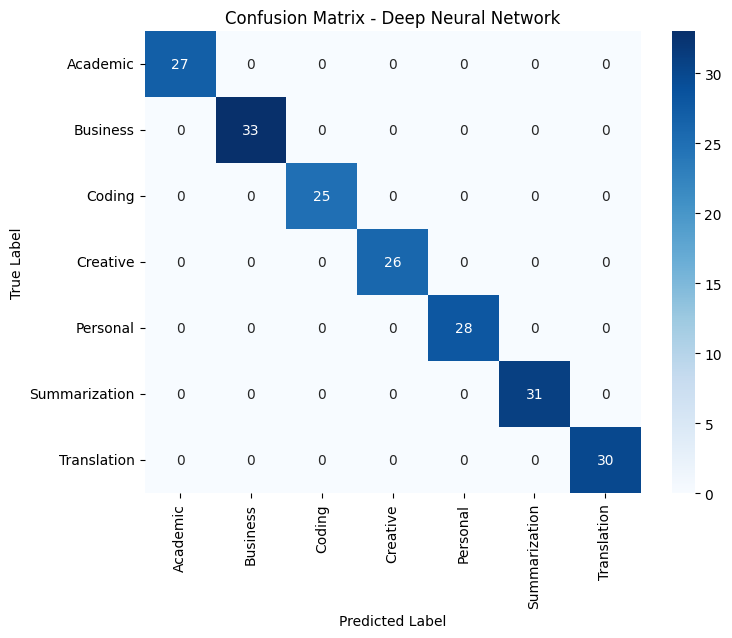

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Deep Neural Network")
plt.show()
